In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mango = pd.read_csv("data/Mango_nir_vis.csv")
mango

,Set,Season,Region,Date,Type,Cultivar,Pop,Temp,DM,285,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
0,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.792506,0,...,0,0,0,0,0,0,0,0,0,0
1,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.792506,0,...,0,0,0,0,0,0,0,0,0,0
2,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.070979,0,...,0,0,0,0,0,0,0,0,0,0
3,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.070979,0,...,0,0,0,0,0,0,0,0,0,0
4,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.394013,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11686,Val Ext,4,QLD,25/01/2019,Ripen,HG,112,No,18.986948,0,...,0,0,0,0,0,0,0,0,0,0
11687,Val Ext,4,QLD,25/01/2019,Ripen,HG,112,No,19.711791,0,...,0,0,0,0,0,0,0,0,0,0
11688,Val Ext,4,QLD,25/01/2019,Ripen,HG,112,No,19.711791,0,...,0,0,0,0,0,0,0,0,0,0
11689,Val Ext,4,QLD,25/01/2019,Ripen,HG,112,No,19.478639,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#fig_full_spec = mango.iloc[:, 9:].T.plot(legend=False).get_figure()
#fig_full_spec.savefig("full_spec.png")

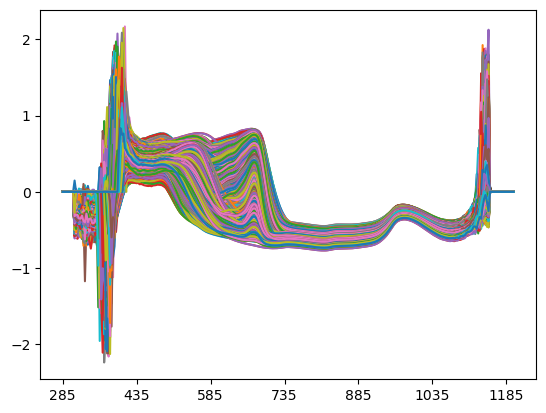

In [4]:
full_spec = mango.iloc[:, 9:]
full_spec.T.plot(legend=False)
plt.show()

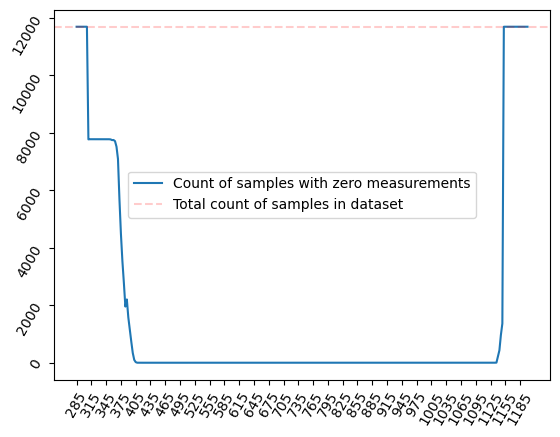

In [5]:
count_zeros = full_spec.shape[0] - full_spec.astype(bool).sum(axis=0)
fig, ax = plt.subplots()
ax.plot(count_zeros, label="Count of samples with zero measurements")
#ax.xticks(rotation=90)
ax.set_xticks(ax.get_xticks()[::10])
ax.tick_params(labelrotation=60)

plt.axhline(y=len(full_spec), color='r', alpha=0.2, linestyle='--', label="Total count of samples in dataset")
plt.legend(loc='best')
fig.savefig("figs/zeros_count.png")
plt.show()

In [6]:
sum(mango["DM"].value_counts().values==1)

403

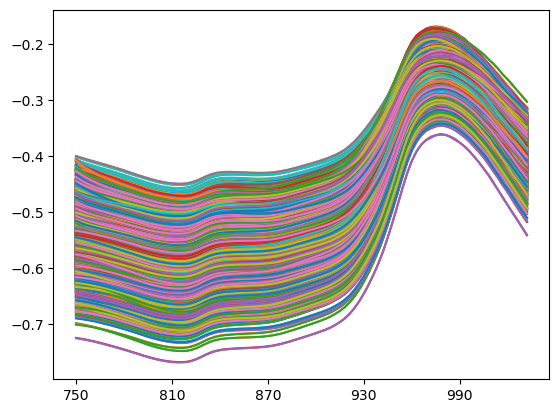

In [17]:
mango.loc[:, "750":"1032"].T.plot(legend=False)
plt.show()

In [12]:
nir_spec = mango.loc[:, "699":]
fig_nir_spec = nir_spec.T.plot(legend=False)
plt.title("NIR spectra")
plt.show()

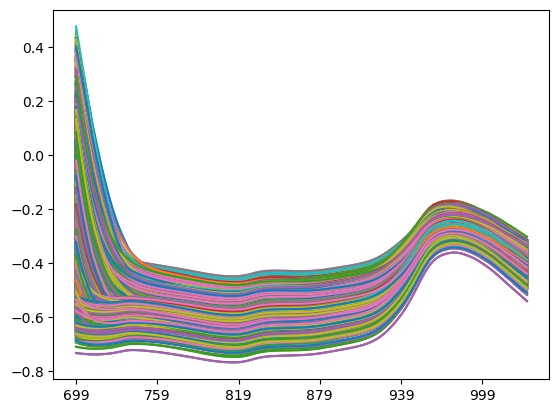

In [14]:
nir_spec_final = mango.loc[:, "699":"1032"]
nir_spec_final.T.plot(legend=False)
plt.title("NIR spectra without noise")
plt.show()

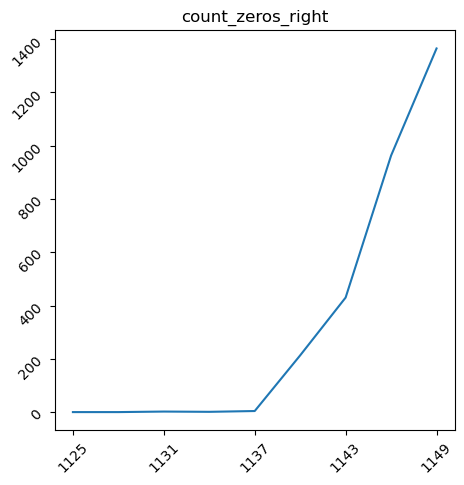

In [9]:
count_zeros_right = count_zeros.loc['1125':'1149']

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_axes([0.1, 0.1, 0.4, 0.8])

ax1.plot(count_zeros_right)
ax1.set_xticks(ax1.get_xticks()[::2])
ax1.tick_params(labelrotation=45)
ax1.set_title("count_zeros_right")

plt.savefig("figs/count_zeros_right")
plt.show()


In [10]:
right_nir_spec = mango.loc[:, "1029":"1149"].T.plot(legend=False).get_figure()
plt.savefig("figs/right_nir_spec.png")

In [11]:
print(count_zeros.loc["402":"411"])
print(count_zeros.loc["1131":"1140"])

402    100
405     21
408      1
411      0
dtype: int64
1131      2
1134      1
1137      4
1140    213
dtype: int64


In [42]:
def calculate_univariate_stats(df):
    df_stats = df.describe().iloc[1:, :]
    df_stats.loc["skew", :] = df.skew()
    df_stats.loc["kurtosis", :] = df.kurt()
    return df_stats

In [45]:
nir_spec_final.describe()

,699,702,705,708,711,714,717,720,723,726,...,1005,1008,1011,1014,1017,1020,1023,1026,1029,1032
count,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,...,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000
mean,-0.123162,-0.199940,-0.263980,-0.318334,-0.365023,-0.399503,-0.428450,-0.452599,-0.472235,-0.487807,...,-0.294912,-0.303412,-0.313140,-0.322841,-0.332712,-0.342583,-0.352658,-0.362665,-0.372671,-0.382551
std,0.235237,0.210937,0.187597,0.165222,0.143710,0.126228,0.110450,0.096424,0.084219,0.073777,...,0.021615,0.022039,0.022588,0.023106,0.023681,0.024232,0.024812,0.025405,0.026013,0.026600
min,-0.734356,-0.736275,-0.737754,-0.738881,-0.739556,-0.739596,-0.739143,-0.738262,-0.736787,-0.734744,...,-0.422618,-0.434706,-0.448103,-0.461035,-0.474959,-0.488119,-0.501761,-0.514517,-0.527912,-0.541722
25%,-0.269896,-0.338238,-0.390958,-0.432930,-0.465742,-0.488718,-0.506373,-0.519847,-0.529812,-0.537624,...,-0.305518,-0.314226,-0.324411,-0.334360,-0.344545,-0.354699,-0.364970,-0.375324,-0.385583,-0.395830
50%,-0.094188,-0.181835,-0.254031,-0.314073,-0.364464,-0.401453,-0.431225,-0.455846,-0.474898,-0.489708,...,-0.293401,-0.301704,-0.311199,-0.320693,-0.330391,-0.340030,-0.349864,-0.359781,-0.369692,-0.379407
75%,0.041462,-0.054236,-0.137050,-0.208707,-0.271557,-0.318547,-0.358235,-0.391656,-0.419262,-0.441453,...,-0.281397,-0.289486,-0.298800,-0.308009,-0.317474,-0.326944,-0.336624,-0.346194,-0.355684,-0.365131
max,0.477228,0.386343,0.294760,0.204468,0.119141,0.046175,-0.023080,-0.087446,-0.146220,-0.198758,...,-0.218169,-0.226936,-0.234852,-0.243898,-0.254470,-0.262920,-0.272343,-0.282907,-0.292101,-0.302432


In [44]:
df_stats

,699,702,705,708,711,714,717,720,723,726,...,1005,1008,1011,1014,1017,1020,1023,1026,1029,1032
mean,-0.123162,-0.199940,-0.263980,-0.318334,-0.365023,-0.399503,-0.428450,-0.452599,-0.472235,-0.487807,...,-0.294912,-0.303412,-0.313140,-0.322841,-0.332712,-0.342583,-0.352658,-0.362665,-0.372671,-0.382551
std,0.235237,0.210937,0.187597,0.165222,0.143710,0.126228,0.110450,0.096424,0.084219,0.073777,...,0.021615,0.022039,0.022588,0.023106,0.023681,0.024232,0.024812,0.025405,0.026013,0.026600
min,-0.734356,-0.736275,-0.737754,-0.738881,-0.739556,-0.739596,-0.739143,-0.738262,-0.736787,-0.734744,...,-0.422618,-0.434706,-0.448103,-0.461035,-0.474959,-0.488119,-0.501761,-0.514517,-0.527912,-0.541722
25%,-0.269896,-0.338238,-0.390958,-0.432930,-0.465742,-0.488718,-0.506373,-0.519847,-0.529812,-0.537624,...,-0.305518,-0.314226,-0.324411,-0.334360,-0.344545,-0.354699,-0.364970,-0.375324,-0.385583,-0.395830
50%,-0.094188,-0.181835,-0.254031,-0.314073,-0.364464,-0.401453,-0.431225,-0.455846,-0.474898,-0.489708,...,-0.293401,-0.301704,-0.311199,-0.320693,-0.330391,-0.340030,-0.349864,-0.359781,-0.369692,-0.379407
75%,0.041462,-0.054236,-0.137050,-0.208707,-0.271557,-0.318547,-0.358235,-0.391656,-0.419262,-0.441453,...,-0.281397,-0.289486,-0.298800,-0.308009,-0.317474,-0.326944,-0.336624,-0.346194,-0.355684,-0.365131
max,0.477228,0.386343,0.294760,0.204468,0.119141,0.046175,-0.023080,-0.087446,-0.146220,-0.198758,...,-0.218169,-0.226936,-0.234852,-0.243898,-0.254470,-0.262920,-0.272343,-0.282907,-0.292101,-0.302432
skew,-0.339706,-0.157265,-0.006397,0.115726,0.208130,0.260974,0.287913,0.287608,0.260424,0.206916,...,-0.775710,-0.811465,-0.840141,-0.866852,-0.894843,-0.915017,-0.932521,-0.946255,-0.957057,-0.965078
kurtosis,-0.339765,-0.333699,-0.261294,-0.153864,-0.036176,0.060297,0.138873,0.195479,0.228493,0.249254,...,2.235996,2.231357,2.237392,2.230188,2.225837,2.209990,2.190811,2.168645,2.150167,2.131028


In [41]:
#test.loc["mode", :] = nir_spec_final.mode()[0]


699    -0.106608
702    -0.104274
705    -0.127206
708    -0.167419
711    -0.225201
          ...   
1020   -0.326347
1023   -0.318525
1026   -0.343546
1029   -0.339908
1032   -0.345274
Length: 112, dtype: float64

In [31]:
calculate_univariate_stats(nir_spec_final)

ValueError: Incompatible indexer with DataFrame

In [19]:
from scipy.stats import mode, skew, kurtosis

# Assuming you have a pandas DataFrame called 'data'
# data = pd.DataFrame(np.random.randn(100, 5), columns=list('ABCDE'))

# Function to calculate the metrics for a given feature
def calculate_metrics(feature):
    mode_value = mode(feature)[0][0]
    std_dev = np.std(feature)
    skewness = skew(feature)
    kurt = kurtosis(feature)
    
    return [mode_value, std_dev, skewness, kurt]

# Calculate metrics for each feature and store them in a pandas DataFrame
metrics = []
for column in nir_spec_final.columns:
    metrics.append(calculate_metrics(nir_spec_final[column]))

metrics_df = pd.DataFrame(metrics, columns=['Mode', 'Standard Deviation', 'Skewness', 'Kurtosis'], index=nir_spec_final.columns)
print(metrics_df)


          Mean    Median      Mode  Standard Deviation  Skewness  Kurtosis
699  -0.123162 -0.094188 -0.322561            0.235227 -0.339662 -0.340132
702  -0.199940 -0.181835 -0.622286            0.210928 -0.157245 -0.334069
705  -0.263980 -0.254031 -0.669752            0.187589 -0.006396 -0.261695
708  -0.318334 -0.314073 -0.482182            0.165215  0.115711 -0.154311
711  -0.365023 -0.364464 -0.490656            0.143704  0.208104 -0.036674
...        ...       ...       ...                 ...       ...       ...
1020 -0.342583 -0.340030 -0.339473            0.024231 -0.914900  2.208532
1023 -0.352658 -0.349864 -0.390814            0.024811 -0.932402  2.189361
1026 -0.362665 -0.359781 -0.343546            0.025404 -0.946134  2.167204
1029 -0.372671 -0.369692 -0.415875            0.026012 -0.956934  2.148734
1032 -0.382551 -0.379407 -0.412064            0.026599 -0.964954  2.129604

[112 rows x 6 columns]
